In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/Users/jense/Desktop/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generating Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

# Performing API calls

In [4]:
# OpenWeatherMap API Key
api_key = "24d9c230111c281771fb026a83ade220"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=ribeira%20grande
Processing Record 2 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=chuy
Processing Record 3 of Set 1 | calatayud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=calatayud
Processing Record 4 of Set 1 | eregli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=eregli
Processing Record 5 of Set 1 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=tuatapere
Processing Record 6 of Set 1 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=saleaula
City not found. Skippi

Processing Record 2 of Set 2 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=carnarvon
Processing Record 3 of Set 2 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=dwarka
Processing Record 4 of Set 2 | quesada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=quesada
Processing Record 5 of Set 2 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=prince%20rupert
Processing Record 6 of Set 2 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=faanui
Processing Record 7 of Set 2 | imperia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=imperia
Processing Record 8 of Set 2 | longyearbyen
http://api.openweathermap.org/data/2.5/wea

Processing Record 5 of Set 3 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=east%20london
Processing Record 6 of Set 3 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=bandarbeyla
Processing Record 7 of Set 3 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=nikolskoye
Processing Record 8 of Set 3 | hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=hay%20river
Processing Record 9 of Set 3 | la asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=la%20asuncion
Processing Record 10 of Set 3 | katha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=katha
City not found. Skipping...
Processing Record 11 of Set 3 | che

Processing Record 7 of Set 4 | champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=champerico
Processing Record 8 of Set 4 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=bengkulu
City not found. Skipping...
Processing Record 9 of Set 4 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=san%20patricio
Processing Record 10 of Set 4 | sterling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=sterling
Processing Record 11 of Set 4 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=ketchikan
Processing Record 12 of Set 4 | benghazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=benghazi
Processing Record 13 of Set 4 | kristineh

Processing Record 9 of Set 5 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=kodiak
Processing Record 10 of Set 5 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=inhambane
Processing Record 11 of Set 5 | alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=alyangula
Processing Record 12 of Set 5 | clarksburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=clarksburg
Processing Record 13 of Set 5 | aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=aripuana
Processing Record 14 of Set 5 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=bambous%20virieux
Processing Record 15 of Set 5 | eagle pass
http://api.openweath

Processing Record 12 of Set 6 | marabba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=marabba
Processing Record 13 of Set 6 | haverfordwest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=haverfordwest
Processing Record 14 of Set 6 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=codrington
Processing Record 15 of Set 6 | andilamena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=andilamena
Processing Record 16 of Set 6 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=port%20hardy
Processing Record 17 of Set 6 | ibotirama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=ibotirama
Processing Record 18 of Set 6 | mattru
http://api.openweat

Processing Record 15 of Set 7 | ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=ballina
Processing Record 16 of Set 7 | jega
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=jega
Processing Record 17 of Set 7 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=te%20anau
Processing Record 18 of Set 7 | mangit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=mangit
Processing Record 19 of Set 7 | dalianwan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=dalianwan
Processing Record 20 of Set 7 | huai yot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=huai%20yot
Processing Record 21 of Set 7 | qeshm
http://api.openweathermap.org/data/2.5/weather?units=I

City not found. Skipping...
Processing Record 18 of Set 8 | alvaraes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=alvaraes
Processing Record 19 of Set 8 | junin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=junin
Processing Record 20 of Set 8 | mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=mayo
Processing Record 21 of Set 8 | litoral del san juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=litoral%20del%20san%20juan
City not found. Skipping...
Processing Record 22 of Set 8 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=dikson
Processing Record 23 of Set 8 | ushtobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=ushtobe
Processing Recor

Processing Record 21 of Set 9 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=portland
Processing Record 22 of Set 9 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=lagoa
Processing Record 23 of Set 9 | saint-leu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=saint-leu
Processing Record 24 of Set 9 | walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=walvis%20bay
Processing Record 25 of Set 9 | kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=kalmunai
Processing Record 26 of Set 9 | manutuke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=manutuke
Processing Record 27 of Set 9 | kegayli
http://api.openweathermap.org/data/2.5/w

Processing Record 25 of Set 10 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=antofagasta
Processing Record 26 of Set 10 | moyale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=moyale
Processing Record 27 of Set 10 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=bolungarvik
City not found. Skipping...
Processing Record 28 of Set 10 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=egvekinot
Processing Record 29 of Set 10 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=poum
Processing Record 30 of Set 10 | aloleng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=aloleng
Processing Record 31 of Set 10 | enumclaw
http:/

Processing Record 28 of Set 11 | alekseyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=alekseyevka
Processing Record 29 of Set 11 | lashio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=lashio
Processing Record 30 of Set 11 | voyinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=voyinka
Processing Record 31 of Set 11 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=deputatskiy
Processing Record 32 of Set 11 | salisbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=salisbury
Processing Record 33 of Set 11 | contamana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=contamana
Processing Record 34 of Set 11 | abu zabad
http://api.openweatherm

City not found. Skipping...
Processing Record 31 of Set 12 | punta cardon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=punta%20cardon
Processing Record 32 of Set 12 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=krasnoselkup
City not found. Skipping...
Processing Record 33 of Set 12 | nicoya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=nicoya
Processing Record 34 of Set 12 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=grindavik
Processing Record 35 of Set 12 | sao raimundo das mangabeiras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24d9c230111c281771fb026a83ade220&q=sao%20raimundo%20das%20mangabeiras
Processing Record 36 of Set 12 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,76,PT,1542006157,97,38.52,-28.70,66.52,13.94
1,chuy,88,UY,1542006165,96,-33.69,-53.46,68.82,15.39
2,calatayud,24,ES,1542004200,100,41.35,-1.64,57.20,5.82
3,eregli,64,TR,1542006165,89,37.51,34.05,41.32,3.60
4,tuatapere,64,NZ,1542006166,87,-46.13,167.69,55.41,8.90


# Latitude vs Temperature Plot

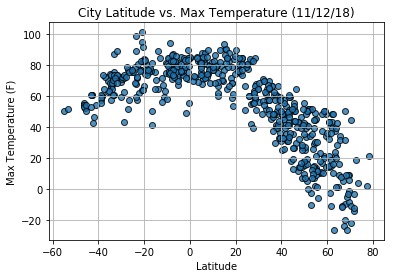

In [8]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/jense/Desktop/Weatherdata/Fig1.png")

# Show plot
plt.show()

# Latitude vs Humidity Plot

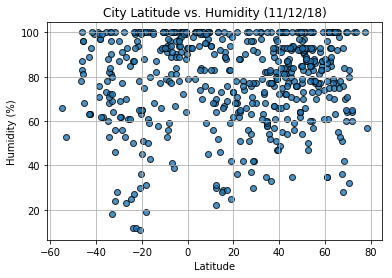

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/jense/Desktop/Weatherdata/Fig2.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

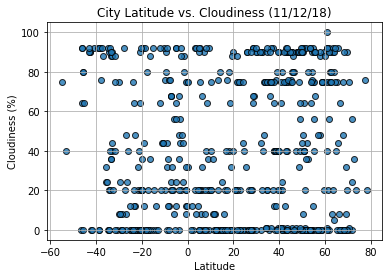

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/jense/Desktop/Weatherdata/Fig3.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

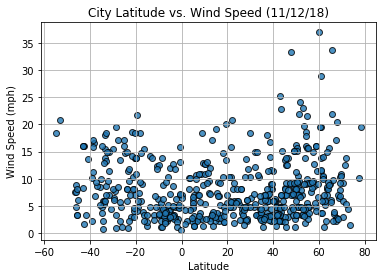

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/jense/Desktop/Weatherdata/Fig4.png")

# Show plot
plt.show()
